---
title: 'Lab 7'
author: "Hunter Blinkenberg"
embed-resources: true
format: 
    html:
        toc: true
        code-fold: true
        theme: cosmo
        echo: true
---

In [225]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import plotnine as plt
from plotnine import *
from sklearn.model_selection import GridSearchCV

In [210]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [211]:
# sex: male = 1
ha['sex']= ha['sex'].astype(str)
ha['restecg']= ha['restecg'].astype(str)
ha['cp']= ha['cp'].astype(str)
ha['output']= ha['output'].astype(str)

In [212]:
X = ha.drop('output', axis = 1)
y = ha['output']

C:\Users\hblin\AppData\Local\Temp\ipykernel_30608\2745068692.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


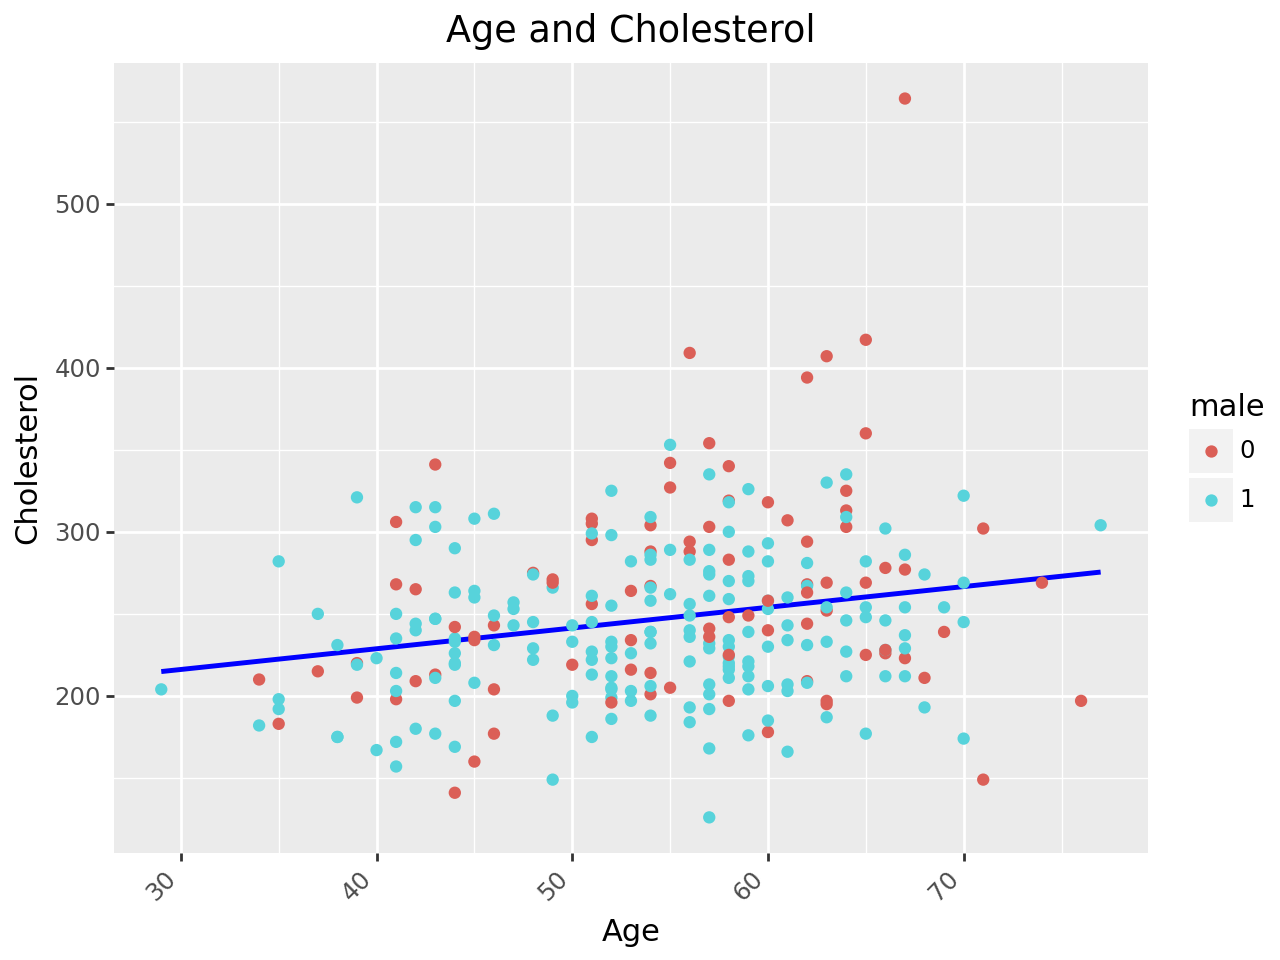

In [ ]:
plot = (
    ggplot(ha)  # Use your DataFrame here
    + aes(x='age', y='chol', color = 'male')  # Aesthetic mappings for x and y variables
    + geom_smooth(method='lm', color='blue', se=False)
    + geom_point()  # Points plotted in red
    + labs(title='Age and Cholesterol', x='Age', y='Cholesterol')  # Adding titles and labels
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
)

# Display the plot
print(plot)

C:\Users\hblin\AppData\Local\Temp\ipykernel_30608\552008800.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


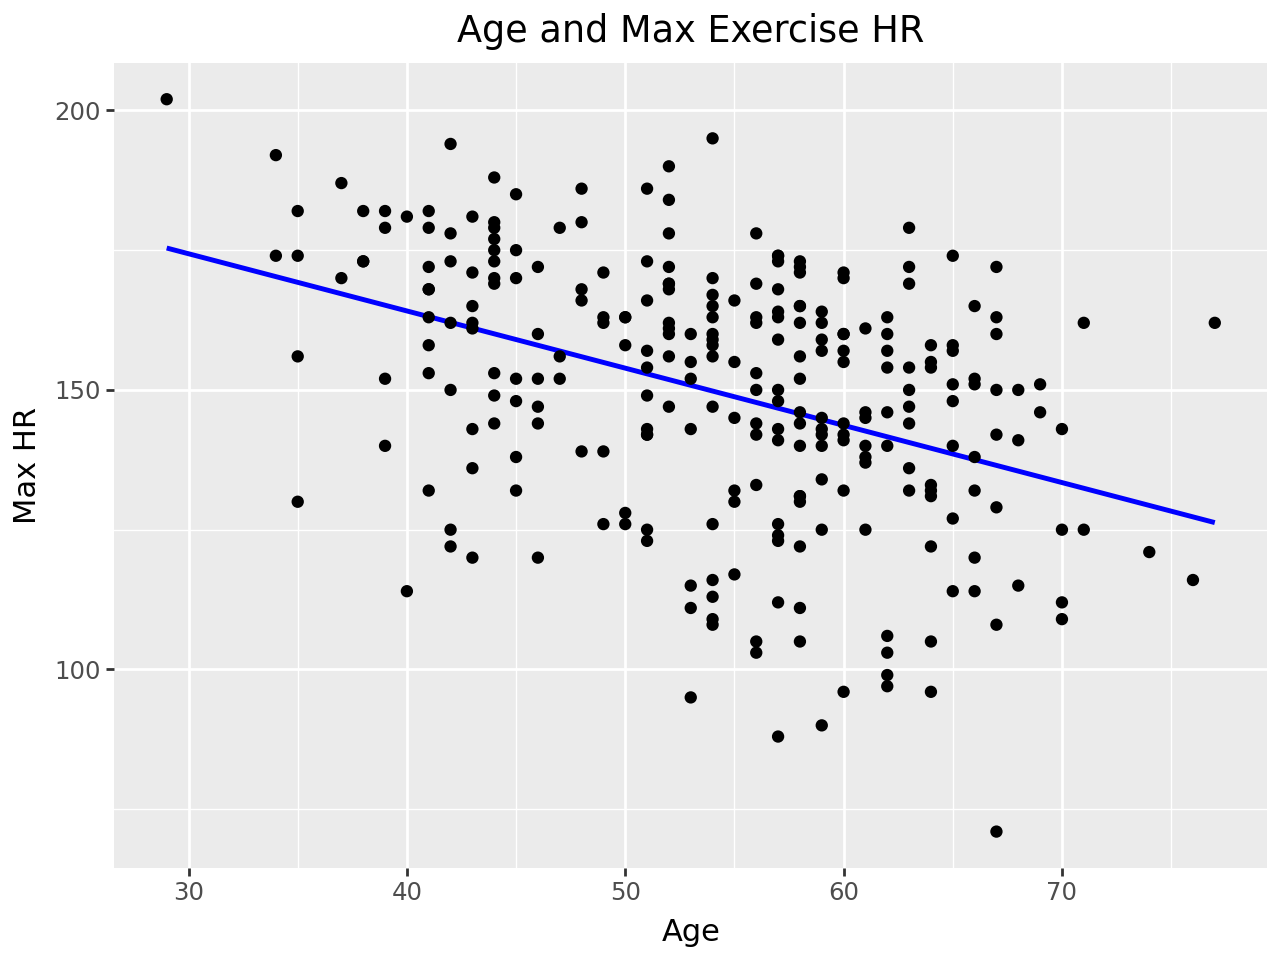

In [ ]:
plot = (
    ggplot(ha)  # Use your DataFrame here
    + aes(x='age', y='thalach')  # Aesthetic mappings for x and y variables
    + geom_smooth(method='lm', color='blue', se=False)
    + geom_point()  # Points plotted in red
     + labs(title='Age and Max Exercise HR', x='Age', y='Max HR')  # Adding titles and labels
    # + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
)

# Display the plot
print(plot)

C:\Users\hblin\AppData\Local\Temp\ipykernel_30608\387399124.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


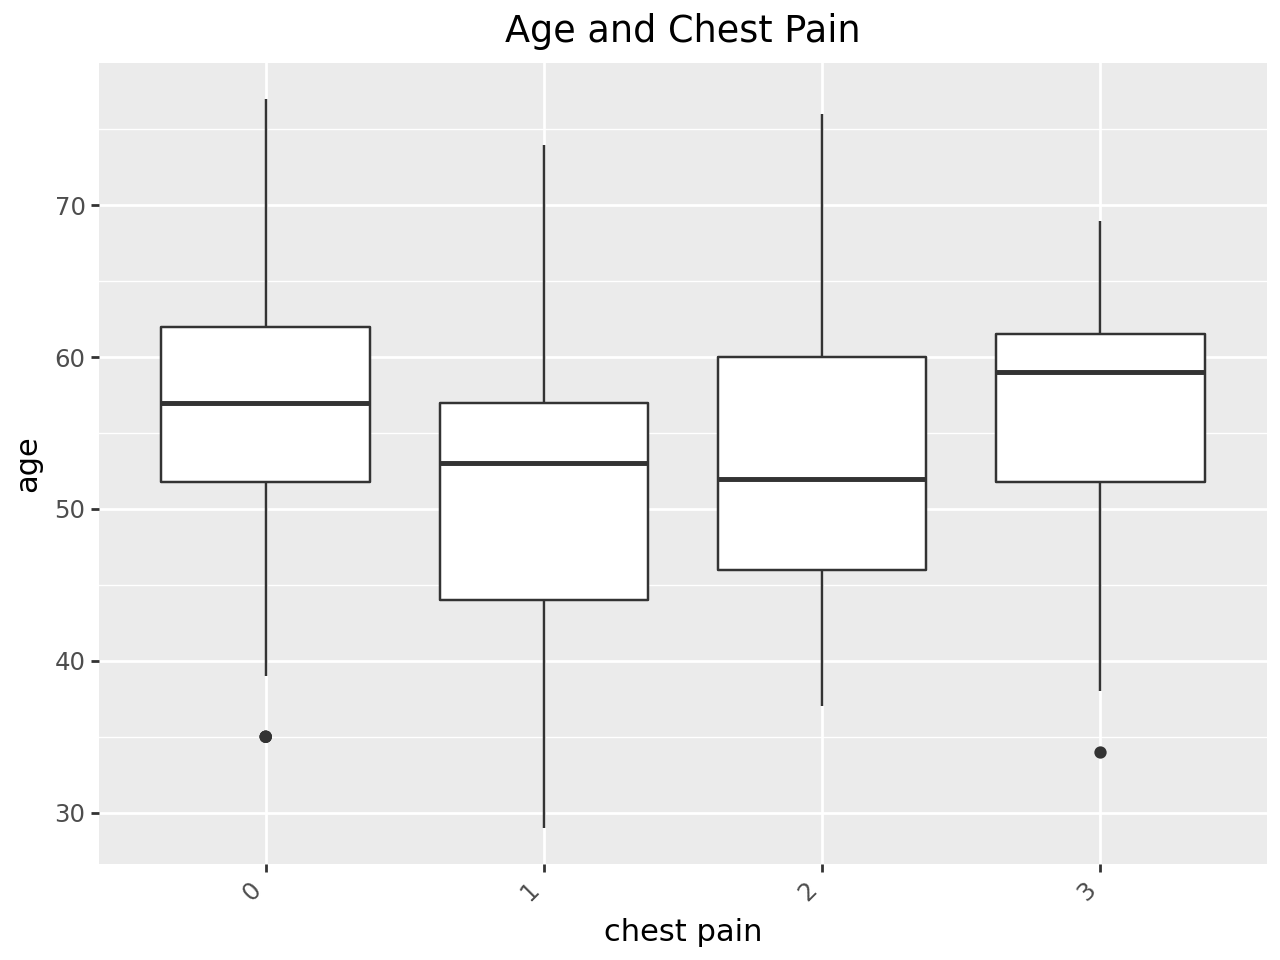

In [ ]:
plot = (
    ggplot(ha)  # Use your DataFrame here
    + aes(x='cp', y='age')  # Aesthetic mappings for x and y variables
    #+ geom_smooth(method='lm', color='blue', se=False)
    + geom_boxplot()  # Points plotted in red
    + labs(title='Age and Chest Pain', x='chest pain', y='age')  # Adding titles and labels
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
)

# Display the plot
print(plot)

C:\Users\hblin\AppData\Local\Temp\ipykernel_30608\705474343.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 4'. Pick better value with 'binwidth'.


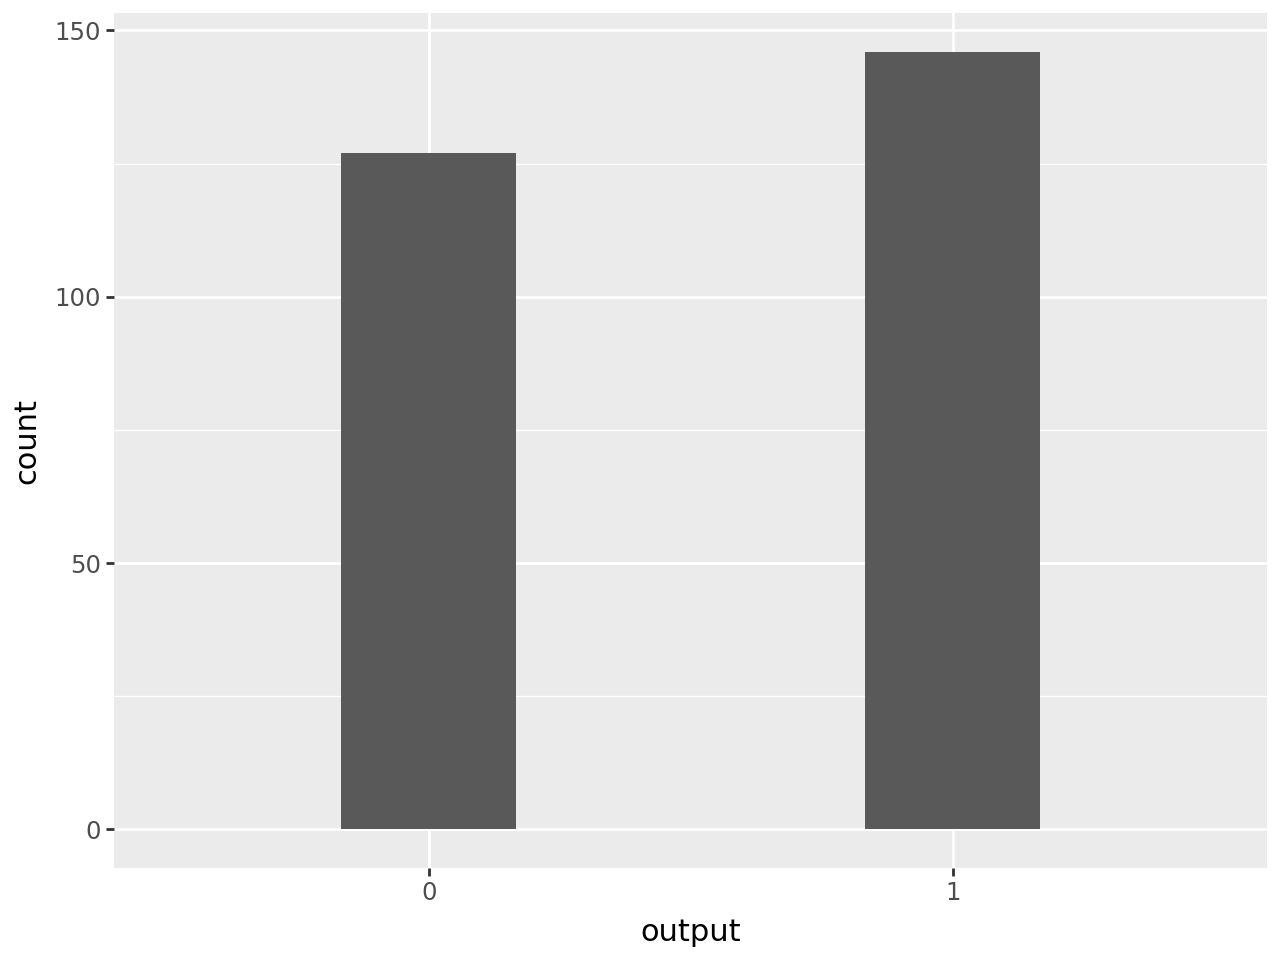

In [ ]:
plot = (
    ggplot(ha)  # Use your DataFrame here
    + aes(x='output')  # Aesthetic mappings for x and y variables
    #+ geom_smooth(method='lm', color='blue', se=False)
    + geom_histogram()  # Points plotted in red
    # + labs(title='Age and Chest Pain', x='chest pain', y='age')  # Adding titles and labels
    # + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
)

# Display the plot
print(plot)

# Fitting Models / Metrics 
## All metrics are fitted within each model

This section asks you to create a final best model for each of the model types studied this week. For each, you should:

Find the best model based on ROC AUC for predicting the target variable.

Report the (cross-validated!) ROC AUC metric.

Fit the final model.

Output a confusion matrix; that is, the counts of how many observations fell into each predicted class for each true class.

(Where applicable) Interpret the coefficients and/or estimates produced by the model fit.

You should certainly try multiple model pipelines to find the best model. You do not need to include the output for every attempted model, but you should describe all of the models explored. You should include any hyperparameter tuning steps in your writeup as well.

In [ ]:
X_no_age = ha.drop(['output','age'], axis = 1)
X_no_sex = ha.drop(['output','sex'], axis = 1)


## KNN 

In [226]:

# Define the preprocessing step for categorical and numeric columns
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=98))]
)

# Fit the model
knn_pipeline.fit(X, y)


# Cross-validated ROC AUC calculation
cv_roc_auc_scores = cross_val_score(knn_pipeline, X, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')

# Report cross-validation ROC AUC
mean_cv_roc_auc = cv_roc_auc_scores.mean()
std_cv_roc_auc = cv_roc_auc_scores.std()

print(f"Cross-validated ROC AUC: {mean_cv_roc_auc:.4f} ± {std_cv_roc_auc:.4f}")

# If you want to predict on the same dataset for exploration
y_pred = knn_pipeline.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

y_pred = knn_pipeline.predict(X)

# Generate and print the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)


Cross-validated ROC AUC: 0.8158 ± 0.0575
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       127
           1       0.79      0.72      0.75       146

    accuracy                           0.75       273
   macro avg       0.75      0.75      0.75       273
weighted avg       0.75      0.75      0.75       273

Confusion Matrix:
[[ 99  28]
 [ 41 105]]


In [ ]:
# Define the preprocessing step for categorical and numeric columns
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=71))]
)

# Fit the model
knn_pipeline.fit(X_no_age, y)

# Cross-validated ROC AUC calculation
cv_roc_auc_scores = cross_val_score(knn_pipeline, X_no_age, y, cv=10, scoring='roc_auc')

# Report cross-validation ROC AUC
mean_cv_roc_auc = cv_roc_auc_scores.mean()
std_cv_roc_auc = cv_roc_auc_scores.std()

print(f"Cross-validated ROC AUC: {mean_cv_roc_auc:.4f} ± {std_cv_roc_auc:.4f}")

# If you want to predict on the same dataset for exploration
y_pred = knn_pipeline.predict(X_no_age)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Cross-validated ROC AUC: 0.8406 ± 0.0881
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       127
           1       0.78      0.77      0.78       146

    accuracy                           0.76       273
   macro avg       0.76      0.76      0.76       273
weighted avg       0.76      0.76      0.76       273

Confusion Matrix:
[[ 96  31]
 [ 34 112]]


In [227]:
param_grid = {
    "knn__n_neighbors": [5, 10, 20, 50, 71, 98],  # Example values for n_neighbors
    "knn__weights": ["uniform", "distance"],  # Different weighting schemes
    "knn__p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X, y)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")



Best Parameters: {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-validated ROC AUC: 0.8507
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       127
           1       0.82      0.73      0.77       146

    accuracy                           0.77       273
   macro avg       0.77      0.77      0.77       273
weighted avg       0.78      0.77      0.77       273

Confusion Matrix:
[[104  23]
 [ 40 106]]
True Negative Rate (Specificity): 0.8189


For the KNN models, I started off with a random value for k and a cv= 5. I went through a few iterations testing different k values, and then realized that my models performed better when using a cv of 10. From here I created a grid search for the different hyperparameters and used some variable omission and ended up with a ROC AUC of .8507 for the whole dataset.

Interpretations for the Classification report/ confusion matrix on the entire dataset are as follows:

The precision of the model was .72 for 0 and .82 for 1. This means that when the model predicts 0, it is correct 72% of the time, and that when the model predicts 1, it is correct 82% of the time. 

The recall for the model was .82 for 0 and .73 for 1. This means that out of all predicted class 0 cases, 82% of them were true 0 cases, and for all predicted class 1 cases, 73% of them were true 1 cases.

There were 104 true negatives in this model, and 106 true positives. 

The specificity of the model is .8189, which means that out of all predicted class 0 cases, 82% of them were actually class 0. 

## Logistic Regression

In [228]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

# Define the pipeline for logistic regression
lgr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lgr", LogisticRegression())]
)

# Fit the model
lgr_pipeline.fit(X, y)

# Cross-validated ROC AUC calculation
cv_roc_auc_scores = cross_val_score(lgr_pipeline, X, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')

# Report cross-validation ROC AUC
mean_cv_roc_auc = cv_roc_auc_scores.mean()
std_cv_roc_auc = cv_roc_auc_scores.std()

print(f"Cross-validated ROC AUC: {mean_cv_roc_auc:.4f} ± {std_cv_roc_auc:.4f}")

# If you want to predict on the same dataset for exploration
y_pred = lgr_pipeline.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)


Cross-validated ROC AUC: 0.8644 ± 0.0530
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       127
           1       0.80      0.84      0.82       146

    accuracy                           0.80       273
   macro avg       0.80      0.80      0.80       273
weighted avg       0.80      0.80      0.80       273

Confusion Matrix:
[[ 96  31]
 [ 24 122]]


In [229]:
param_grid = {
    "lgr__C": [0.001, 0.1, 1, 10, 100],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    "lgr__solver": ["lbfgs", "liblinear"],  # Different solvers
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for Logistic Regression
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(lgr_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X, y)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")



Best Parameters: {'lgr__C': 1, 'lgr__penalty': 'l2', 'lgr__solver': 'lbfgs'}
Best Cross-validated ROC AUC: 0.8644
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       127
           1       0.80      0.84      0.82       146

    accuracy                           0.80       273
   macro avg       0.80      0.80      0.80       273
weighted avg       0.80      0.80      0.80       273

Confusion Matrix:
[[ 96  31]
 [ 24 122]]
True Negative Rate (Specificity): 0.7559


In [230]:
# Access the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Get the logistic regression model from the pipeline
lgr_model = best_model.named_steps['lgr']

# Get the transformer used for preprocessing (ColumnTransformer)
ct = best_model.named_steps['preprocessing']

# Get the names of the features after preprocessing
# For OneHotEncoder, it will give you the transformed feature names
# The get_feature_names_out() function generates feature names for the transformed data
categorical_features = ct.transformers_[0][1].get_feature_names_out(input_features=X.select_dtypes(include=['object']).columns)
numerical_features = X.select_dtypes(include=[np.number]).columns

# Combine the categorical and numerical feature names
feature_names = np.concatenate([categorical_features, numerical_features])

# Access the coefficients from the LogisticRegression model
coefficients = lgr_model.coef_.flatten()

# Create a dictionary to label the coefficients
coeff_dict = dict(zip(feature_names, coefficients))

# Print the labeled coefficients
print("Labeled Coefficients:")
for feature, coef in coeff_dict.items():
    print(f"{feature}: {coef}")



Labeled Coefficients:
sex_0: 0.9959942562414135
sex_1: -0.9966571474393431
cp_0: -1.4054696784680543
cp_1: 0.611635408623295
cp_2: 0.4830179408011128
cp_3: 0.31015343784571264
restecg_0: -0.033291364749088496
restecg_1: 0.2990899543715453
restecg_2: -0.26646148082039706
age: -0.23217230765224156
trtbps: -0.3225023161225111
chol: -0.27397006947524744
thalach: 0.7614594223938381


For the Logistic Regression models, I started off with no penalty and saw what ROC value that gave me. From there I went through a few iterations testing different c values, and then realized that my models performed better when using a c of 10. I ended up with an ROC AUC of .8644. So far this is the best model I could find. 

Interpretations for the Classification report/ confusion matrix on the entire dataset are as follows:

The precision of the model was .8 for 0 and .8 for 1. This means that when the model predicts 0, it is correct 80% of the time, and that when the model predicts 1, it is correct 80% of the time. 

The recall for the model was .76 for 0 and .84 for 1. This means that out of all predicted class 0 cases, 76% of them were true 0 cases, and for all predicted class 1 cases, 83% of them were true 1 cases. 

There were 97 true negatives in this model, and 121 true postitives.

The specificity of the model was .7638, whcih means that out of all predicted class 0 cases, 76% of them were actually class 0.

Additionally, the most important coefficients in the model seem to be sex, cp, and thalach.

## Decision Tree

In [231]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

# Define the pipeline for logistic regression
dt_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dt", DecisionTreeClassifier(max_depth=3,random_state=52))]
)

# Fit the model
dt_pipeline.fit(X_no_age, y)

# Cross-validated ROC AUC calculation
cv_roc_auc_scores = cross_val_score(dt_pipeline, X_no_age, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')

# Report cross-validation ROC AUC
mean_cv_roc_auc = cv_roc_auc_scores.mean()
std_cv_roc_auc = cv_roc_auc_scores.std()

print(f"Cross-validated ROC AUC: {mean_cv_roc_auc:.4f} ± {std_cv_roc_auc:.4f}")

# If you want to predict on the same dataset for exploration
y_pred = dt_pipeline.predict(X_no_age)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Cross-validated ROC AUC: 0.7566 ± 0.0238
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       127
           1       0.88      0.71      0.79       146

    accuracy                           0.79       273
   macro avg       0.81      0.80      0.79       273
weighted avg       0.81      0.79      0.79       273

Confusion Matrix:
[[113  14]
 [ 42 104]]


In [233]:
import matplotlib.pyplot as mpl

param_grid = {
    "dt__max_depth": [3, 5, 7, 10, None],  # Vary max depth of the tree
    "dt__min_samples_split": [2, 5, 10],  # Vary minimum samples to split
    "dt__min_samples_leaf": [1, 2, 4],    # Vary minimum samples per leaf
    "dt__criterion": ["gini", "entropy"]  # Vary the splitting criterion
}

# Define the pipeline with DecisionTreeClassifier
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]
)

# Set up GridSearchCV for cross-validation and hyperparameter search
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=StratifiedKFold(n_splits=10), scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV with your data
grid_search.fit(X, y)

# Retrieve and print the best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the best cross-validated ROC AUC score
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")




Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
Best Cross-validated ROC AUC: 0.8073
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       127
           1       0.82      0.82      0.82       146

    accuracy                           0.81       273
   macro avg       0.81      0.81      0.81       273
weighted avg       0.81      0.81      0.81       273

Confusion Matrix:
[[101  26]
 [ 26 120]]
True Negative Rate (Specificity): 0.7953


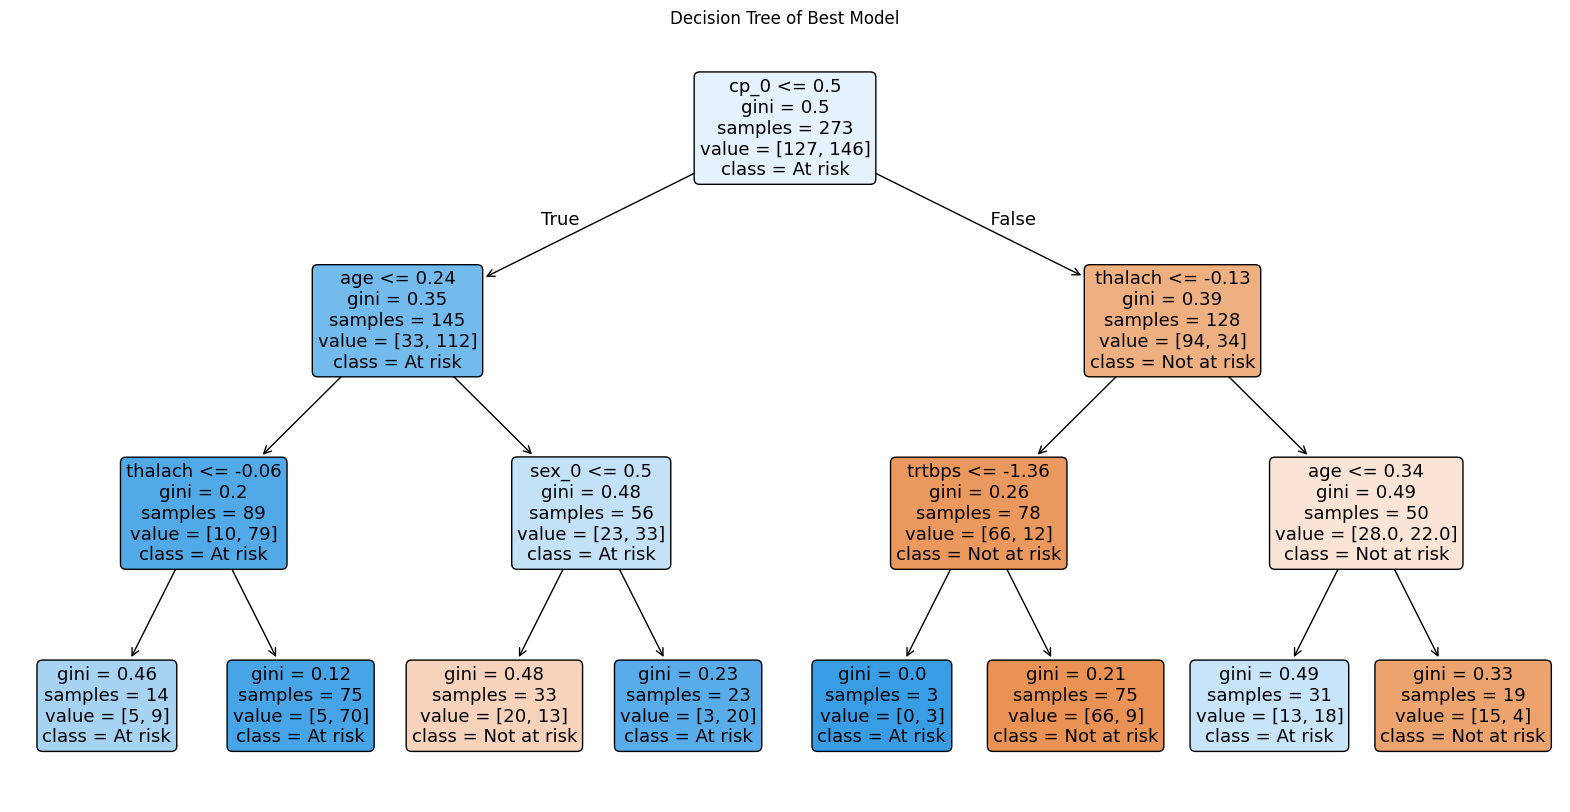

In [ ]:
# After applying preprocessing, you can extract the column names of the transformed features:
# Apply the preprocessing transformer to X (without fitting the pipeline again)
transformed_X = ct.fit_transform(X)

# Get the column names from the transformed X (after one-hot encoding and scaling)
# Note: If you use OneHotEncoder, it may produce new feature names based on the categories
feature_names = ct.transformers_[0][1].get_feature_names_out(X.select_dtypes(include=object).columns)

# Combine feature names after encoding and scaling
final_feature_names = list(feature_names) + list(X.select_dtypes(include=np.number).columns)

# Plot the decision tree
mpl.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=final_feature_names, 
          class_names=['Not at risk', 'At risk'], rounded=True, proportion=False, precision=2)
plt.title("Decision Tree of Best Model")
plt.show()



For the Decision Tree models, I started off with omitting age from the model and saw what ROC value that gave me. From there I went through a few iterations testing different omissions/hyperparameters,and ended up with an ROC AUC of .8073. So far this is the best model I could find. 

Interpretations for the Classification report/ confusion matrix on the entire dataset are as follows:

The precision of the model was .8 for 0 and .82 for 1. This means that when the model predicts 0, it is correct 80% of the time, and that when the model predicts 1, it is correct 82% of the time. 

The recall for the model was .8 for 0 and .82 for 1. This means that out of all predicted class 0 cases, 80% of them were true 0 cases, and for all predicted class 1 cases, 82% of them were true 1 cases. 

There were also 101 true negatives in this model, and 120 true positives. 

The specificity of this model is .7953, which means that out of all predicted class 0 cases, 80% of them were true 0 cases. 


## Interpretation

Which predictors were most important to predicting heart attack risk?

cp, thalach, and age were the first splits on the decision tree, and sex was a pretty high predictor in the logistic model. These seem to be the most important predictors. 

## ROC Curve

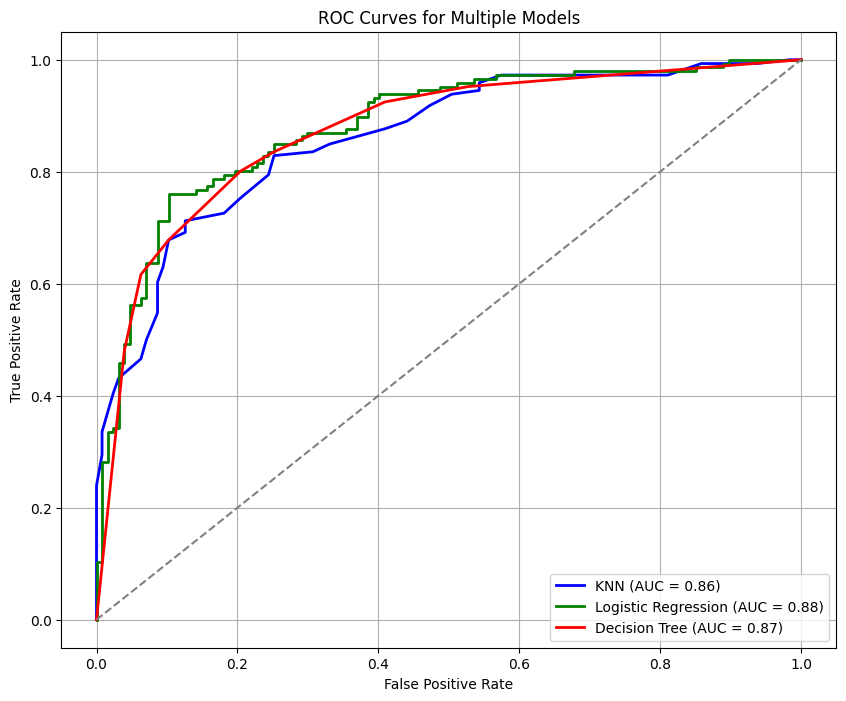

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define your parameter grids for each model
y = y.astype(int)
# KNN Parameter Grid
param_grid_knn = {
    "knn__n_neighbors": [5, 10, 20, 50, 71, 98],  # Example values for n_neighbors
    "knn__weights": ["uniform", "distance"],  # Different weighting schemes
    "knn__p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Logistic Regression Parameter Grid
param_grid_lgr = {
    "lgr__C": [0.001, 0.1, 1, 10, 100],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    "lgr__solver": ["lbfgs", "liblinear"],  # Different solvers
}

# Decision Tree Parameter Grid
param_grid_dt = {
    "dt__max_depth": [3, 5, 7, 10, None],  # Vary max depth of the tree
    "dt__min_samples_split": [2, 5, 10],  # Vary minimum samples to split
    "dt__min_samples_leaf": [1, 2, 4],    # Vary minimum samples per leaf
    "dt__criterion": ["gini", "entropy"]  # Vary the splitting criterion
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Assume you already have X and y defined
# Split your data into training and testing sets if not already done
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Model
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  # Default classifier
)
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X, y)
knn_best_model = grid_search_knn.best_estimator_
y_pred_prob_knn = knn_best_model.predict_proba(X)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Logistic Regression Model
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)
grid_search_lgr = GridSearchCV(lgr_pipeline, param_grid_lgr, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)
grid_search_lgr.fit(X, y)
lgr_best_model = grid_search_lgr.best_estimator_
y_pred_prob_lgr = lgr_best_model.predict_proba(X)[:, 1]
fpr_lgr, tpr_lgr, _ = roc_curve(y, y_pred_prob_lgr)
roc_auc_lgr = auc(fpr_lgr, tpr_lgr)

# Decision Tree Model
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]  # Default classifier
)
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X, y)
dt_best_model = grid_search_dt.best_estimator_
y_pred_prob_dt = dt_best_model.predict_proba(X)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot all ROC curves on the same graph
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lgr, tpr_lgr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lgr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.title('ROC Curves for Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


# Discussion

Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.

Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.

## Q1
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

Metric: I would want to minimize false negatives, so recall would be the most valuable metric.

Model chosen: Knn Model, since it has the greates percentage of recall for its cases classified as 0 

Expected metric value: .82

## Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

Metric: I would want to minimize false positives, so precision would be the most valuable metric. 

Model Chosen: I would use my decision tree model with a class 1 precision of .82

Expected metric value: .82

## Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

Metric: I would want a balanced metric to understand root causes so I would want to use ROC-AUC. 

Model Chosen: I would use my logistic regression model since it has the highest ROC-AUC metric.

Expected metric value: .87

## Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

Metric: I would want to see which doctors are most accurately predicting, so accuracy would be the primary metric.

Model chosen: I would choose my decision tree model since it has the best accuracy metric

Expected metric value: .81

# Validation

In [214]:
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")

In [215]:
ha_validation['sex']= ha_validation['sex'].astype(str)
ha_validation['restecg']= ha_validation['restecg'].astype(str)
ha_validation['cp']= ha_validation['cp'].astype(str)
ha_validation['output']= ha_validation['output'].astype(str)

In [216]:
X_v = ha_validation.drop('output', axis= 1)
y_v = ha_validation['output']

## Knn

In [218]:
param_grid = {
    "knn__n_neighbors": [10],  # Example values for n_neighbors
    "knn__weights": ["uniform"],  # Different weighting schemes
    "knn__p": [1]  # 1 for Manhattan, 2 for Euclidean distance
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_v, y_v)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_v)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y_v, y_pred))

cm = confusion_matrix(y_v, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")

#Best Parameters: {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}

Best Parameters: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-validated ROC AUC: 0.8125
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.85      0.89      0.87        19

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.82        30
weighted avg       0.83      0.83      0.83        30

Confusion Matrix:
[[ 8  3]
 [ 2 17]]
True Negative Rate (Specificity): 0.7273


## Logistic Regression

In [219]:
param_grid = {
    "lgr__C": [10],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    "lgr__solver": ["liblinear"],  # Different solvers
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for Logistic Regression
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(lgr_pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_v, y_v)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_v)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y_v, y_pred))

cm = confusion_matrix(y_v, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")

#Best Parameters: {'lgr__C': 10, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}

Best Parameters: {'lgr__C': 10, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}
Best Cross-validated ROC AUC: 0.8500
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
[[ 9  2]
 [ 0 19]]
True Negative Rate (Specificity): 0.8182


## Decision Tree

In [221]:
import matplotlib.pyplot as mpl

param_grid = {
    "dt__max_depth": [3],  # Vary max depth of the tree
    "dt__min_samples_split": [2],  # Vary minimum samples to split
    "dt__min_samples_leaf": [2],    # Vary minimum samples per leaf
    "dt__criterion": ["gini"]  # Vary the splitting criterion
}

# Define the pipeline with DecisionTreeClassifier
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]
)

# Set up GridSearchCV for cross-validation and hyperparameter search
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV with your data
grid_search.fit(X_v, y_v)

# Retrieve and print the best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the best cross-validated ROC AUC score
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_v)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y_v, y_pred))

cm = confusion_matrix(y_v, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}")

#Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}


Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
Best Cross-validated ROC AUC: 0.5750
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

Confusion Matrix:
[[11  0]
 [ 4 15]]
True Negative Rate (Specificity): 1.0000


It seems that all of my ROC-AUC values have gone down with the validation data. This could meant that I overfit a bit but overall I would say it follows relatively similarly to the training data. The accuracy, precision, and recall all look even better than the models above as well which is a good sign. 

# Cohen's Kappa

Use online resources to research this measurement. Calculate it for the models from Part One, Q1-3, and discuss reasons or scenarios that would make us prefer to use this metric as our measure of model success. Do your conclusions from above change if you judge your models using Cohen’s Kappa instead? Does this make sense?

In [222]:
from sklearn.metrics import cohen_kappa_score
param_grid = {
    "knn__n_neighbors": [5, 10, 20, 50, 71, 98],  # Example values for n_neighbors
    "knn__weights": ["uniform", "distance"],  # Different weighting schemes
    "knn__p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X, y)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

kappa = cohen_kappa_score(y, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

Best Parameters: {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-validated ROC AUC: 0.8507
Cohen's Kappa: 0.5402


In [223]:
param_grid = {
    "lgr__C": [0.001, 0.1, 1, 10, 100],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    "lgr__solver": ["lbfgs", "liblinear"],  # Different solvers
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for Logistic Regression
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)

# Set up GridSearchCV
grid_search = GridSearchCV(lgr_pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X, y)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

kappa = cohen_kappa_score(y, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

Best Parameters: {'lgr__C': 10, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}
Best Cross-validated ROC AUC: 0.8679
Cohen's Kappa: 0.5941


In [224]:
import matplotlib.pyplot as mpl

param_grid = {
    "dt__max_depth": [3, 5, 7, 10, None],  # Vary max depth of the tree
    "dt__min_samples_split": [2, 5, 10],  # Vary minimum samples to split
    "dt__min_samples_leaf": [1, 2, 4],    # Vary minimum samples per leaf
    "dt__criterion": ["gini", "entropy"]  # Vary the splitting criterion
}

# Define the pipeline with DecisionTreeClassifier
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]
)

# Set up GridSearchCV for cross-validation and hyperparameter search
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV with your data
grid_search.fit(X, y)

# Retrieve and print the best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the best cross-validated ROC AUC score
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

kappa= cohen_kappa_score(y,y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
Best Cross-validated ROC AUC: 0.8073
Cohen's Kappa: 0.6172


Cohen's Kappa is a measure of inter-rater reliability for categorical variables. It's used to evaluate the agreement between two raters on a scale from 0 to 1. A higher Kappa value indicates greater agreement between the raters. I might want to use this for some of my models, since it accounts for chance and collaborates between two different "raters". My models do change, and compared to the ROC-AUC, they seem to suffer greatly. However, they all fall around the "moderate agreement" level, and the decision tree has the highest kappa score. This could because the decision tree is better at capturing non-linear relationships. 